In [25]:
import sklearn
from sklearn.linear_model import Ridge
import time
from scipy.io import loadmat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [26]:
raw = loadmat(r"C:\Users\parkf\Desktop\summer2021\eegData\for_Barry\282L.mat") #change this to try different one off files
X = raw['data']   #[0][0]['data'] #file format is different from ###L/R.mat vs the sample data
mask = raw['mask']
l = X.shape[0]
c = X.shape[1]

In [5]:
memVec = [4, 8, 12]
ridgeVec = [.1, .5, 1]

cvNum = 3

s = (len(memVec), len(ridgeVec), c, cvNum)
error = np.zeros(s)
for memNumber in memVec:
    featureMat = functionList.buildFeatureMat(X,memNumber)
    xClean = functionList.removeTrash(X,mask,memNumber)
    featureMat = functionList.removeTrash(featureMat,mask,memNumber)
    for regularizer in ridgeVecNormal: 
        crossVal = sklearn.model_selection.KFold(n_splits=cvNum)
        for thisChannel in range(c):
            adjustedReg = regularizer*np.linalg.norm(xClean[:,thisChannel])
            cvRun = 0
            for train, test in crossVal.split(featureMat):
                pred = functionList.predRrOutput(featureMat[train,:], featureMat[test,:], xClean[train,thisChannel], adjustedReg, 0)
                err = functionList.findMSE(pred, xClean[test,thisChannel])
                error[memVec.index(memNumber), ridgeVec.index(regularizer), thisChannel, cvRun] = err
                cvRun = cvRun + 1
errNoCv = np.mean(error,3)

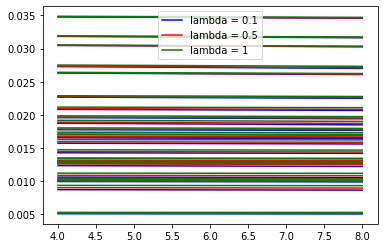

In [24]:
ridgeDict = {0: "blue", 1: "red", 2:"green"}

for i in range(len(ridgeVec)):
    for thisChannel in range(c):
        plt.plot(memVec[:], errNoCv[:,i,thisChannel], label = f"lambda = {ridgeVec[i]}", color = ridgeDict[i])

#stops duplicate labels. from: https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend ecatmur
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

#plt.legend()
plt.show()